Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank)

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Loading congress twitter data

In [2]:
congress = pd.read_csv(
    'congress.edgelist',
    delimiter=' ',
    names=['source', 'target', 'weight'],
)
congress



,source,target,weight
0,4,{'weight':,0.002105263157894737}
0,12,{'weight':,0.002105263157894737}
0,18,{'weight':,0.002105263157894737}
0,25,{'weight':,0.004210526315789474}
0,30,{'weight':,0.002105263157894737}
...,...,...,...
456,435,{'weight':,0.009615384615384616}
456,442,{'weight':,0.009615384615384616}
456,449,{'weight':,0.009615384615384616}
456,453,{'weight':,0.009615384615384616}


In [3]:
G = nx.from_pandas_edgelist(congress, 'source', 'target')

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

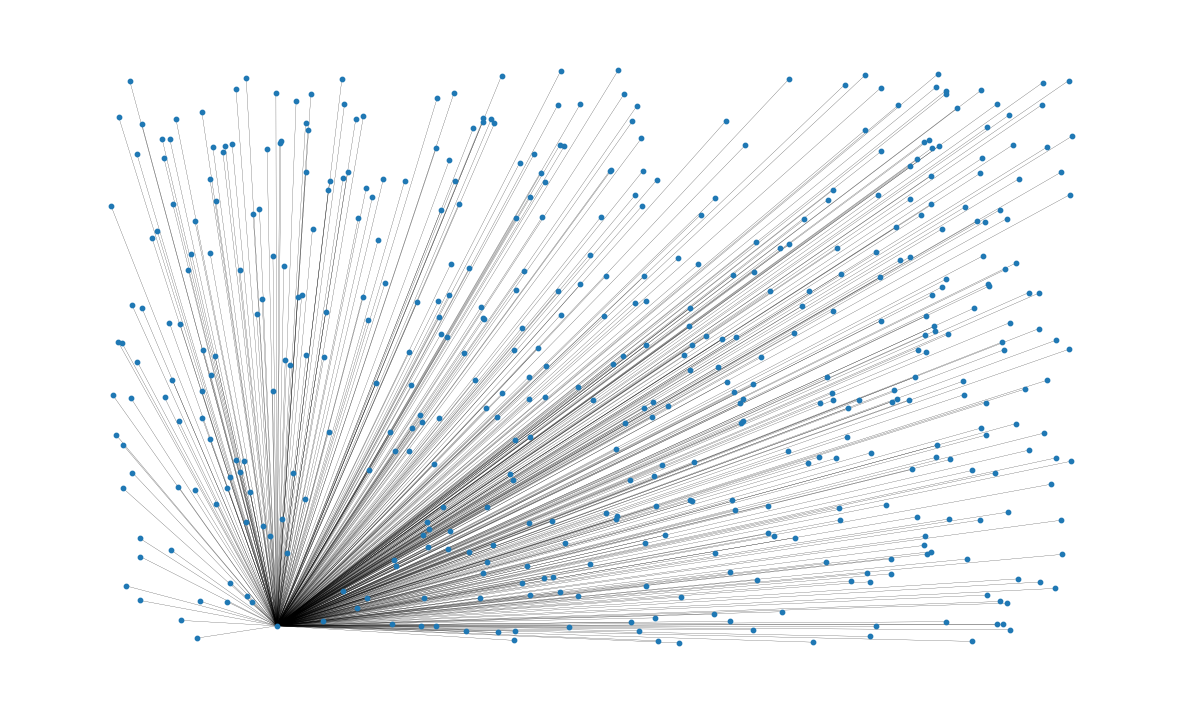

In [4]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

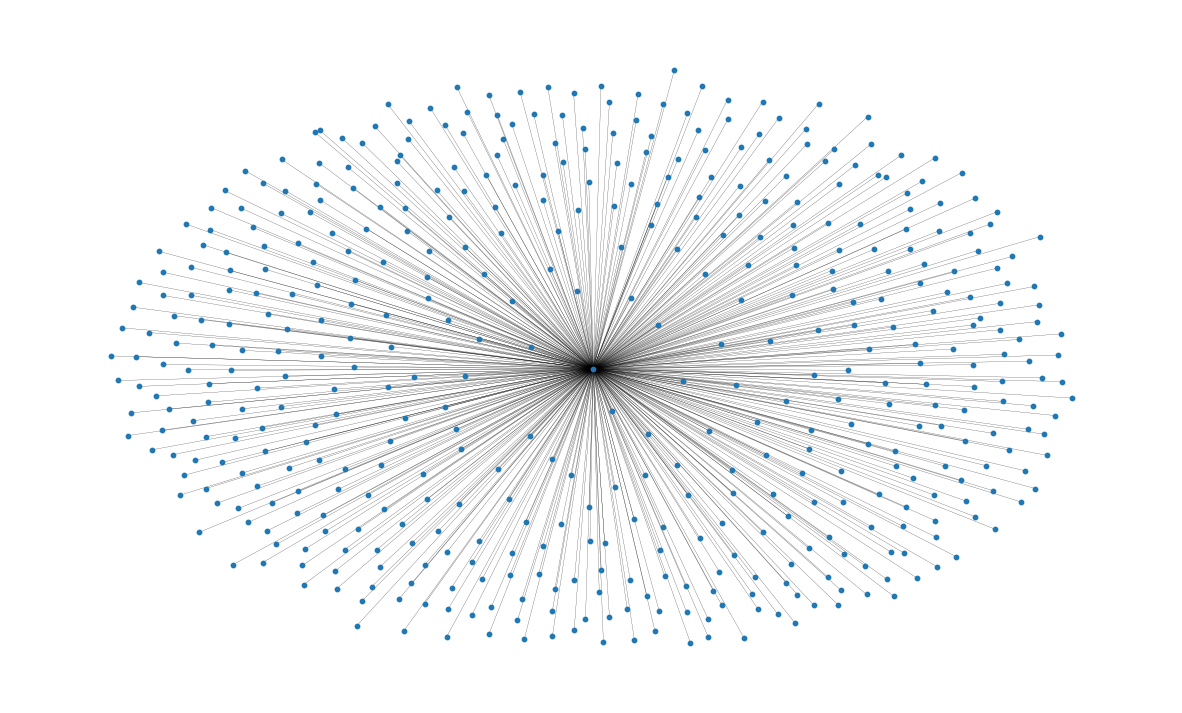

In [5]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [7]:
G.number_of_nodes()

470

In [8]:
G.number_of_edges()

469

In [10]:
degrees = [d for _, d in G.degree()]

1.995744680851064

### degree distribution

In [16]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 1.995744680851064
Median degree: 1.0
Max degree: 469
Min degree: 1



## Shortest-paths analysis

In [21]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

2

In [22]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

2

In [23]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

1.991498415572657

Text(0, 0.5, 'Frequency (%)')

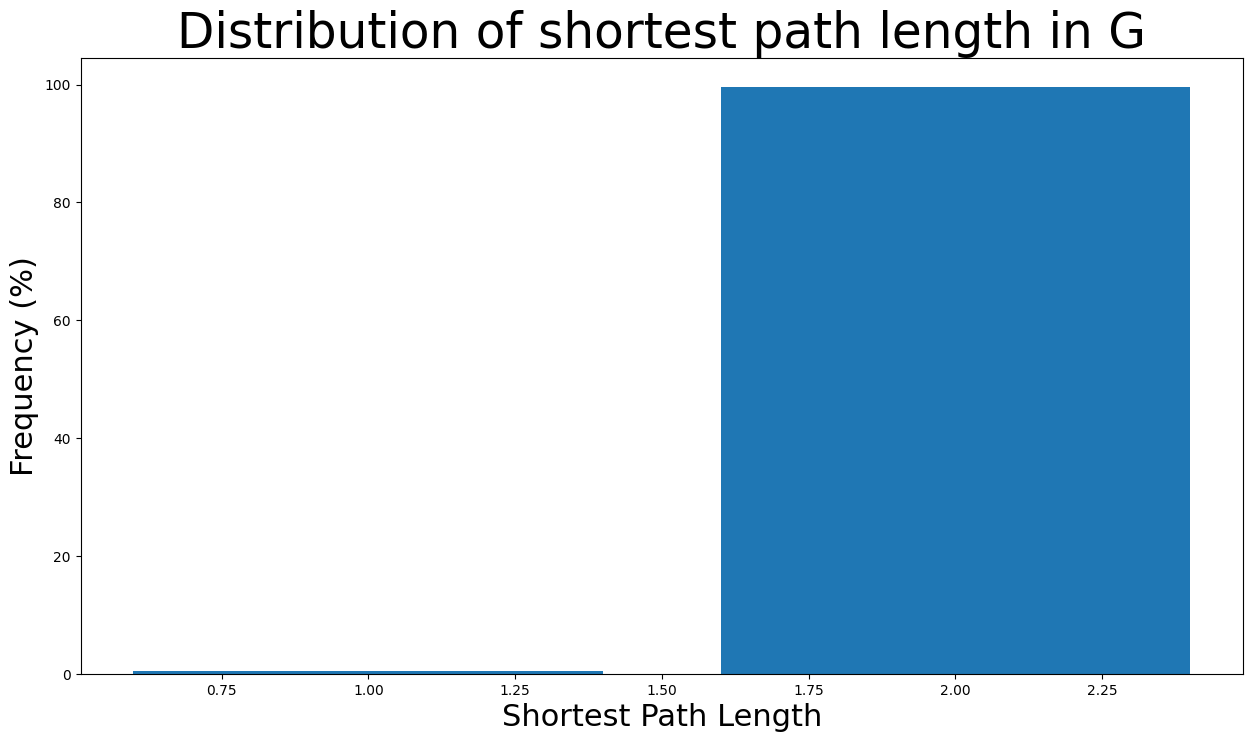

In [24]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [25]:
nx.density(G)

0.00425531914893617

In [26]:
nx.number_connected_components(G)

1

## Analysis of two or more centrality measures